# Independent investigation of TMDB dataset that will knock your socks off:
### Just take them off now ok?
First let's read/convert our CSV to a Pandas dataframe:

In [1]:
## I prefer to import each library at the beginning of the Notebook
## It is important to note that this investigation was built using the Python 2 kernel, 
## so there will be errors in the print statements if you are using Python 3.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Let's start by creating our PandaS DataFrame from the provided CSV:

In [23]:
movie_data = pd.read_csv('tmdb-movies.csv')

movie_data.head(5)
#printing only the first 5 rows will allow me to see what data is contained in my DataFrame:

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## In this investigation I would like to know how budget and revenue relate to the popularity rating.

- I postulate there is a positive correlation between popularity vs budget, as well as revenue vs popularity. I am not sure about budget vs revenue, but I think there will be a positive correlation here as well.
    - My hypothesis is that the more money spent, the more exposure a film gets, and therefore the more revenue and higher popularity rating.

### Here are some ways I plan to do this after cleaning/wrangling:

Primary Analyis:

1.) Group the data by year, analyzing 3 seperate years each 10 years apart

2.) Plot popularity vs revenue, popularity vs budget, budget vs revenue

3.) Calculate Pearson's R Value for each correlation
    
4.) Create a scatter plot of revenue and budget for each selected year, with the size of each dot being popularity

Secondary Analysis:

1.) Confirm or deny findings by graphing each correlation (R value) over time


### Important Note(s):

- In actuality many variables contribute to a films popularity, however, we cannot investigate them all for brevity's sake. Most big data companies can do this using more complex algorithms.
- I do not know the exact calculation used to acquire the popularity rating. This may affect our conclusions since we can only assume that the higher the number, the more popular the film.
- I am not using the budget/revenue adjusted for inflation figures. This is because when these data are compared to popularity, inflation should not factor in.


### We should build functions to standardize our data, and calculate Pearson's R:

In [25]:
# Let's start by defining functions to standardize our data:

# for standardizing columns of data.
def standardize_column(column):
    return (column-column.mean()) / column.std(ddof=0)

# for standardizing rows, I may not use this one.
def standardize_rows(df):
    mean_diffs = df.sub(df.mean(axis='columns'), axis='index')
    return mean_diffs.div(df.std(axis='columns',ddof=0), axis='index')

def standardize(df):
    return df.apply(standardize_column)

# And this function will help us see a correlation between two sets of variables (Pearson's R)
# We may need to adapt it to the data fram we are using later on

def correlation(x,y):
    xstd = (x-x.mean()) / x.std(ddof=0)
    ystd = (y-y.mean()) / y.std(ddof=0)
    return (xstd*ystd).mean()

## For starters, I would like to slice the data to create three data sets, the most current year 2015 (our primary investigation set) and  for comparison: 2000 and 1985.

We can use PandaS `set_index()` function to set the index to the movie title to make our data more understandable:

I noticed that PandaS used Float values for adjusted revenue and budget, we need those to be integers to work with them.

In [30]:
#First thing to do will be to convert them to integers:
movie_data['budget_adj'] = movie_data['budget_adj'].apply(np.int64)
movie_data['revenue_adj'] = movie_data['revenue_adj'].apply(np.int64)

In [31]:
#Here let's set the index to be the title so the data is more readable:
movies_in_2015 = movie_data[movie_data['release_year']==2015].set_index('original_title')
movies_in_2000 = movie_data[movie_data['release_year']==2000].set_index('original_title')
movies_in_1985 = movie_data[movie_data['release_year']==1985].set_index('original_title')

## Next, let's trim down our dataframe to only include the factors budget, revenue, and popularity

In [32]:
pop_bdgt_rev_2015 = movies_in_2015[['budget_adj','popularity', 'revenue_adj']]
pop_bdgt_rev_2000 = movies_in_2000[['budget_adj','popularity', 'revenue_adj']]
pop_bdgt_rev_1985 = movies_in_1985[['budget_adj','popularity', 'revenue_adj']]

pop_bdgt_rev_1985.head(20)

,budget_adj,popularity,revenue_adj
original_title,,,
Back to the Future,38516154,6.095293,772572771
The Breakfast Club,2027166,2.834739,104450077
Ladyhawke,40543321,1.753688,37364724
Mad Max Beyond Thunderdome,24945338,1.746063,73444670
A View to a Kill,60814981,1.623978,308996785
Legend,50679151,1.613752,31425355
The Goonies,38516154,1.596994,124447075
A Nightmare on Elm Street Part 2: Freddy's Revenge,6081498,1.299275,60813386
Rambo: First Blood Part II,89195306,1.177428,608961557


## Back to the future AND Rocky IV?? '85 was a good year :-)
### But ... I noticed after printing this dataset, that there were lot's of movies with "0" for the budget.
That doesn't seem right, because it's impossible for a movie not to have a budget. Perhaps for some movies, this data was simply not made available and auto-filled as '0'? So let's clean up the data and remove those entries, simply because we cannot use or trust them:

In [7]:
# 2015
pop_bdgt_rev_2015 = pop_bdgt_rev_2015[pop_bdgt_rev_2015['budget_adj']>0]

# and for our comparison years:
pop_bdgt_rev_2000 = pop_bdgt_rev_2000[pop_bdgt_rev_2000['budget_adj']>0]
pop_bdgt_rev_1985 = pop_bdgt_rev_1985[pop_bdgt_rev_1985['budget_adj']>0]

# Now we see only the movies with data for budget:
pop_bdgt_rev_2015.head()

,budget_adj,popularity,revenue_adj
original_title,,,
Jurassic World,137999939,32.985763,1392445892
Mad Max: Fury Road,137999939,28.419936,348161292
Insurgent,101199955,13.112507,271619025
Star Wars: The Force Awakens,183999919,11.173104,1902723129
Furious 7,174799923,9.335014,1385748801


### Now let's standardize our columns:
This will make our data easy to compare, since the values for revenue and popularity are wildly different.

In [34]:
standardized_data_2015 = standardize(pop_bdgt_rev_2015)
standardized_data_2000 = standardize(pop_bdgt_rev_2000)
standardized_data_1985 = standardize(pop_bdgt_rev_1985)

# here is a sample:
standardized_data_2015.head()

,budget_adj,popularity,revenue_adj
original_title,,,
Jurassic World,4.159594,14.315640,8.773253
Mad Max: Fury Road,4.159594,12.270185,2.003314
Insurgent,2.953240,5.412575,1.507102
Star Wars: The Force Awakens,5.667537,4.543738,12.081304
Furious 7,5.365949,3.720288,8.729837


# Let's investigate Budget vs Popularity:

**We can start by calculating Pearson's R to see if there is a positive correlation:**

**2015**

In [35]:
correlation(pop_bdgt_rev_2015['budget_adj'], pop_bdgt_rev_2015['popularity'])

0.67656471428710641

**2000**

In [36]:
correlation(pop_bdgt_rev_2000['budget_adj'], pop_bdgt_rev_2000['popularity'])

0.52807035463839858

**1985**

In [37]:
correlation(pop_bdgt_rev_1985['budget_adj'], pop_bdgt_rev_1985['popularity'])

0.31804156825747881

# Now let's investigate Revenue vs Popularity:


**2015**

In [38]:
correlation(pop_bdgt_rev_2015['revenue_adj'], pop_bdgt_rev_2015['popularity'])

0.70225705889573198

**2000**

In [39]:
correlation(pop_bdgt_rev_2000['revenue_adj'], pop_bdgt_rev_2000['popularity'])

0.72633196672266376

**1985**

In [40]:
correlation(pop_bdgt_rev_1985['revenue_adj'], pop_bdgt_rev_1985['popularity'])

0.68637194663470058

# What about Budget vs Revenue?

**2015**

In [41]:
correlation(pop_bdgt_rev_2015['revenue_adj'], pop_bdgt_rev_2015['budget_adj'])

0.80076275168940969

**2000**

In [42]:
correlation(pop_bdgt_rev_2000['revenue_adj'], pop_bdgt_rev_2000['budget_adj'])

0.712763256214619

**1985**

In [43]:
correlation(pop_bdgt_rev_1985['revenue_adj'], pop_bdgt_rev_1985['budget_adj'])

0.48474556820412745

# ScatterPlot* of Standardized data:

*Dot size = standardized popularity rating times 10

Populating the interactive namespace from numpy and matplotlib


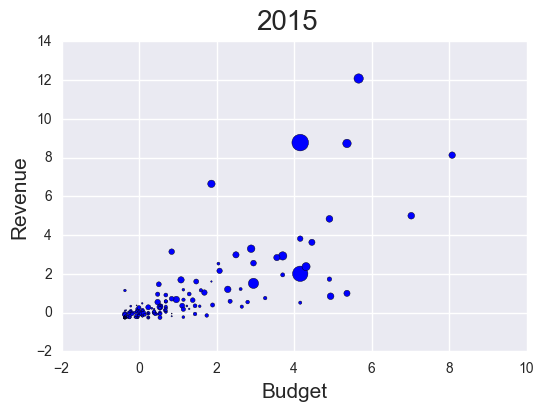

In [44]:
%pylab inline

plt.scatter(standardized_data_2015['budget_adj'], standardized_data_2015['revenue_adj'], \
            s= (standardized_data_2015['popularity']*10))

# Let's label the graph:
plt.suptitle('2015', fontsize = 20)
plt.xlabel('Budget', fontsize=15)
plt.ylabel("Revenue", fontsize=15)

Populating the interactive namespace from numpy and matplotlib


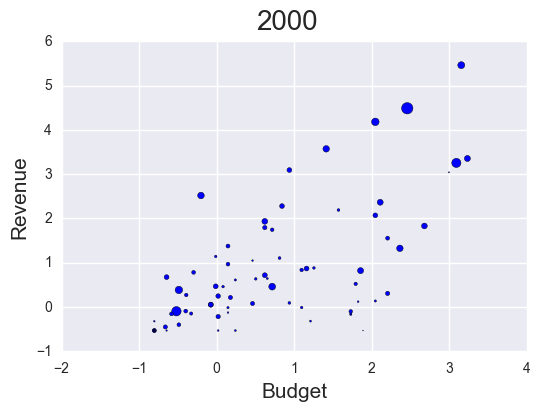

In [45]:
%pylab inline

plt.scatter(standardized_data_2000['budget_adj'], standardized_data_2000['revenue_adj'], \
            s= (standardized_data_2000['popularity']*10))

# Let's label the graph:
plt.suptitle('2000', fontsize = 20)
plt.xlabel('Budget', fontsize=15)
plt.ylabel("Revenue", fontsize=15)

Populating the interactive namespace from numpy and matplotlib


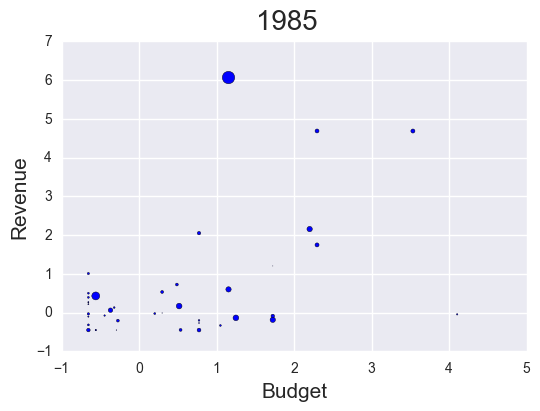

In [46]:
%pylab inline

plt.scatter(standardized_data_1985['budget_adj'], standardized_data_1985['revenue_adj'], \
            s= (standardized_data_1985['popularity']*10))

# Let's label the graph:
plt.suptitle('1985', fontsize = 20)
plt.xlabel('Budget', fontsize=15)
plt.ylabel("Revenue", fontsize=15)

# Initial Obersvations:
- There is a positive correlation between revenue and popularity
    - This correlation stays the same over time
- There is a positive correlation between budget and popularity
    - This correlation increases over time
- There is a positive correlation between budget and revenue
    - This correlation appears to increase over time

## Let's plot each correlation over time to get a better visual:
We will need to use the full data set and take the mean of the budget and revenue

In [48]:
# Full list:
movies_all = movie_data[['release_year','budget_adj','popularity', 'revenue_adj']]
# Trimming out the 0s in the budget category again for all movies:
pop_bdgt_rev_all = movies_all[movies_all['budget_adj']>0]

# Each of these functions are adaptations of the correlation function.
# Each one selects only the variables we need for each comparison.
def correlate_pop_bdgt(df):
    x = df['budget_adj']
    y = df['popularity']
    xstd = (x-x.mean()) / x.std(ddof=0)
    ystd = (y-y.mean()) / y.std(ddof=0)
    return (xstd*ystd).mean()

def correlate_pop_rev(df):
    x = df['revenue_adj']
    y = df['popularity']
    xstd = (x-x.mean()) / x.std(ddof=0)
    ystd = (y-y.mean()) / y.std(ddof=0)
    return (xstd*ystd).mean()

def correlate_bdgt_rev(df):
    x = df['revenue_adj']
    y = df['budget_adj']
    xstd = (x-x.mean()) / x.std(ddof=0)
    ystd = (y-y.mean()) / y.std(ddof=0)
    return (xstd*ystd).mean()


# New variables to represent the individual DataFrames:
bdgt_pop_by_year = pop_bdgt_rev_all.groupby('release_year')[['budget_adj', 'popularity']].apply(correlate_pop_bdgt)

rev_pop_by_year = pop_bdgt_rev_all.groupby('release_year')[['revenue_adj','popularity']].apply(correlate_pop_rev)

rev_bdgt_by_year = pop_bdgt_rev_all.groupby('release_year')[['revenue_adj','budget_adj']].apply(correlate_bdgt_rev)

# Let's take a peek
print bdgt_pop_by_year.mean()
print rev_pop_by_year.mean()
print rev_bdgt_by_year.mean()

0.355362917158
0.657635652892
0.497085361583


## The ugliest sideways Christmas tree of all time

Now that we have a dataframe for each variable, let's plot both revenue and budget over time:

Populating the interactive namespace from numpy and matplotlib


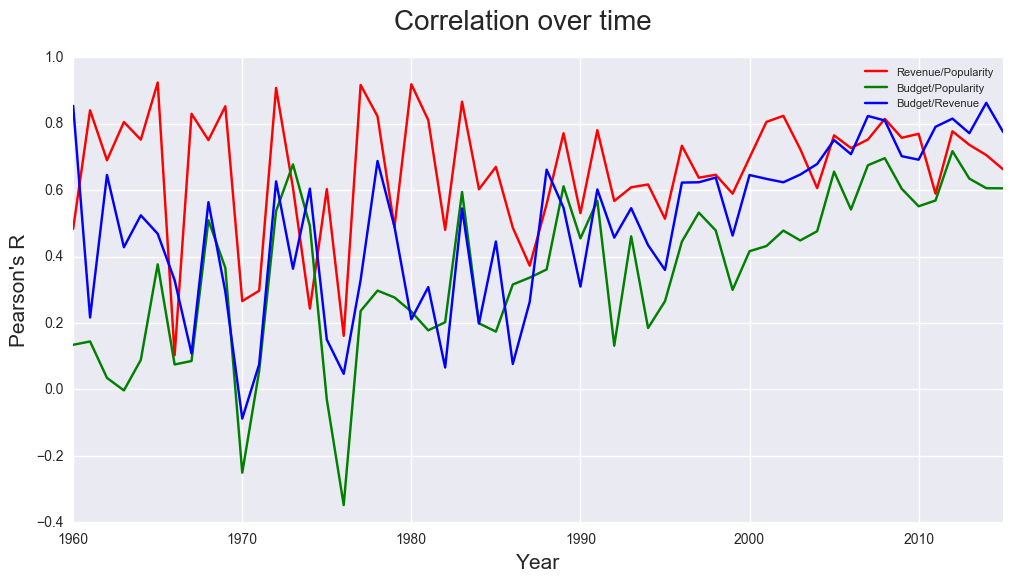

In [49]:
%pylab inline

plt.figure(figsize=(12,6))

rev_pop_by_year.plot(color='red', label='Revenue/Popularity')
bdgt_pop_by_year.plot(color='green', label='Budget/Popularity')
rev_bdgt_by_year.plot(color='blue', label='Budget/Revenue')

# Let's label the graph:
plt.suptitle('Correlation over time', fontsize = 20)
plt.xlabel('Year', fontsize=15)
plt.ylabel("Pearson's R", fontsize=15)
plt.legend(fontsize=8)

# Conclusion

While this analysis was far from comprehensive, my original hypothesis appears to be confirmed. I also found out the correlation between budget and revenue which I was initially unsure of. Below is a bullet point summary:

- There is a positive correlation between revenue and popularity
    - This correlation on average stays the same over time
    - This is a weak correlation and does change drastically the farther back in time we go
        - This makes sense because most movies that make a lot of money are also popular
        - This has not really changed as long as I can remember
- There is a positive correlation between budget and popularity
    - This correlation on average increases over time
        - This also makes sense because big budget hollywood films also have fantastic marketing to make them popular
        - This increase in correlation could also mean that the industry has been gradually commercialized?
        - This could make sense because film makers using the internet can understand trends better
- There is a positive correlation between budget and revenue
    - This correlation appears to be strong before the 70s, then very weak in the 70s-80s, then increase over time after the 1980s
    - While this correlation does jump around from year to year, we still see an overall increase over time
        - This makes sense because again, big budget hollywood films also have fantastic marketing to ensure they succeed
        - This could make sense because film makers using the internet can understand trends better
- The grouping of these three variables tightens over time
    - This could be because the movie industry is becoming gradually more refined
        - This could make sense because film makers using the internet can understand trends better
        
Overall, to really confirm any of this data, many many more variables would need to be investigated. However, this short study has allowed me to probe into film industry data and think critically about correlation of variables and satisfy curiosity. 